In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [73]:
# Load dataset
df = pd.read_csv(r'C:\Users\shiva\Downloads\archive\telco_churn.csv')

# Clean column names
df.columns = df.columns.str.strip()

df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [74]:
# Convert churn label to binary
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Check class distribution
df['Churn Label'].value_counts()


Churn Label
0    5174
1    1869
Name: count, dtype: int64

## Handle missing values

In [75]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [76]:
df = df.drop(['Customer ID'], axis=1)


## Basic EDA

<Axes: xlabel='Churn Label', ylabel='Monthly Charge'>

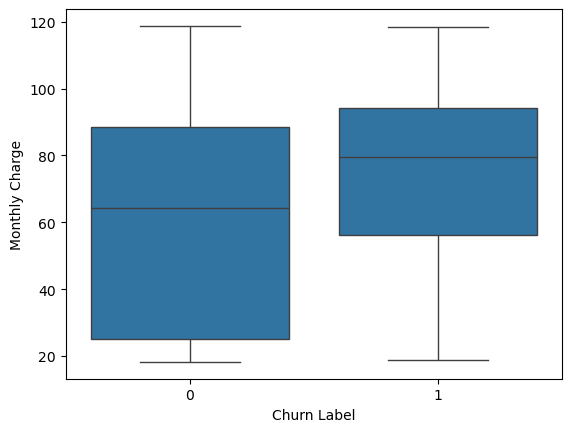

In [84]:

sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)


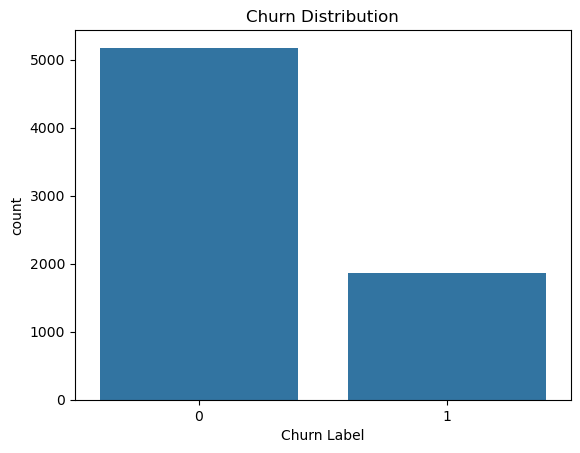

In [85]:
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Distribution')
plt.show()


## Encode categorical variables

In [78]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,78,0,90022,34.023810,-118.156582,68701,0,1,0.00,8,...,False,False,False,False,False,False,False,False,False,False
1,74,1,90063,34.044271,-118.185237,55668,1,8,48.85,17,...,False,False,False,False,False,False,False,False,False,False
2,71,3,90065,34.108833,-118.229715,47534,0,18,11.33,52,...,False,False,False,False,False,False,False,False,False,False
3,78,1,90303,33.936291,-118.332639,27778,1,25,19.76,12,...,False,True,False,False,False,False,False,False,False,False
4,80,1,90602,33.972119,-118.020188,26265,1,37,6.33,14,...,False,False,False,False,False,False,False,False,False,False


## Train-test split

In [79]:
X = df_encoded.drop('Churn Label', axis=1)
y = df_encoded['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Train Logistic Regression model

In [80]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

model


LogisticRegression(max_iter=1000)

## Model evaluation

In [81]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9134137686302342

Confusion Matrix:
 [[984  51]
 [ 71 303]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1035
           1       0.86      0.81      0.83       374

    accuracy                           0.91      1409
   macro avg       0.89      0.88      0.89      1409
weighted avg       0.91      0.91      0.91      1409



# Key Business Insights
- Customers on month-to-month contracts show higher churn rates.
- Customers with higher monthly charges are more likely to churn.
- Long-term customers have lower churn probability.
